In [1]:
import pandas as pd
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import LabelEncoder

import numpy as np

In [2]:
# Load the dataset

df = pd.read_csv("spotify dataset.csv")

In [3]:
df

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,14-06-2019,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.102000,0.000000,0.0653,0.5180,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),13-12-2019,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.072400,0.004210,0.3570,0.6930,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),05-07-2019,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.079400,0.000023,0.1100,0.6130,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,19-07-2019,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.028700,0.000009,0.2040,0.2770,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),05-03-2019,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.080300,0.000000,0.0833,0.7250,123.976,189052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32828,7bxnKAamR3snQ1VGLuVfC1,City Of Lights - Official Radio Edit,Lush & Simon,42,2azRoBBWEEEYhqV6sb7JrT,City Of Lights (Vocal Mix),28-04-2014,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,2,-1.814,1,0.0936,0.076600,0.000000,0.0668,0.2100,128.170,204375
32829,5Aevni09Em4575077nkWHz,Closer - Sultan & Ned Shepard Remix,Tegan and Sara,20,6kD6KLxj7s8eCE3ABvAyf5,Closer Remixed,08-03-2013,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,0,-4.462,1,0.0420,0.001710,0.004270,0.3750,0.4000,128.041,353120
32830,7ImMqPP3Q1yfUHvsdn7wEo,Sweet Surrender - Radio Edit,Starkillers,14,0ltWNSY9JgxoIZO4VzuCa6,Sweet Surrender (Radio Edit),21-04-2014,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,6,-4.899,0,0.0481,0.108000,0.000001,0.1500,0.4360,127.989,210112
32831,2m69mhnfQ1Oq6lGtXuYhgX,Only For You - Maor Levi Remix,Mat Zo,15,1fGrOkHnHJcStl14zNx8Jy,Only For You (Remixes),01-01-2014,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,2,-3.361,1,0.1090,0.007920,0.127000,0.3430,0.3080,128.008,367432


In [4]:
print(df.isnull().sum())

track_id                    0
track_name                  5
track_artist                5
track_popularity            0
track_album_id              0
track_album_name            5
track_album_release_date    0
playlist_name               0
playlist_id                 0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
dtype: int64


In [5]:
df.dropna(inplace=True)

In [6]:
df = df.drop_duplicates()

In [74]:
df = df.drop_duplicates(subset='track_name', keep='first')

In [76]:
# Convert all string columns to lower case
df = df.apply(lambda x: x.str.lower() if x.dtype == 'object' else x)


In [78]:
df

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,cluster
0,6f807x0ima9a1j3vpbc7vn,i don't care (with justin bieber) - loud luxur...,ed sheeran,66,2ocs0dgtsro98gh5zsl2cx,i don't care (with justin bieber) [loud luxury...,14-06-2019,pop remix,37i9dqzf1dxczdd7cfekhw,2,...,-2.634,1,0.0583,0.102000,0.000000,0.0653,0.5180,122.036,194754,2
1,0r7cvbztwzgbtcydfa2p31,memories - dillon francis remix,maroon 5,67,63rpso264urjw1x5e6cwv6,memories (dillon francis remix),13-12-2019,pop remix,37i9dqzf1dxczdd7cfekhw,2,...,-4.969,1,0.0373,0.072400,0.004210,0.3570,0.6930,99.972,162600,2
2,1z1hg7vb0ahhdiemnde79l,all the time - don diablo remix,zara larsson,70,1hosmj2elcsrr0ve9gthr4,all the time (don diablo remix),05-07-2019,pop remix,37i9dqzf1dxczdd7cfekhw,2,...,-3.432,0,0.0742,0.079400,0.000023,0.1100,0.6130,124.008,176616,3
3,75fpbthrwqmzhlbjlugdc7,call you mine - keanu silva remix,the chainsmokers,60,1nqysoef1ykkugovchbsk6,call you mine - the remixes,19-07-2019,pop remix,37i9dqzf1dxczdd7cfekhw,2,...,-3.778,1,0.1020,0.028700,0.000009,0.2040,0.2770,121.956,169093,4
4,1e8pafckuyokkxphrhqw4x,someone you loved - future humans remix,lewis capaldi,69,7m7vv9wlq4i0lfujie2zsq,someone you loved (future humans remix),05-03-2019,pop remix,37i9dqzf1dxczdd7cfekhw,2,...,-4.672,1,0.0359,0.080300,0.000000,0.0833,0.7250,123.976,189052,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32828,7bxnkaamr3snq1vgluvfc1,city of lights - official radio edit,lush & simon,42,2azrobbweeeyhqv6sb7jrt,city of lights (vocal mix),28-04-2014,♥ edm love 2020,6ji1gfr6anftt8mmtva2ux,0,...,-1.814,1,0.0936,0.076600,0.000000,0.0668,0.2100,128.170,204375,4
32829,5aevni09em4575077nkwhz,closer - sultan & ned shepard remix,tegan and sara,20,6kd6klxj7s8ece3abvayf5,closer remixed,08-03-2013,♥ edm love 2020,6ji1gfr6anftt8mmtva2ux,0,...,-4.462,1,0.0420,0.001710,0.004270,0.3750,0.4000,128.041,353120,4
32830,7immqpp3q1yfuhvsdn7weo,sweet surrender - radio edit,starkillers,14,0ltwnsy9jgxoizo4vzuca6,sweet surrender (radio edit),21-04-2014,♥ edm love 2020,6ji1gfr6anftt8mmtva2ux,0,...,-4.899,0,0.0481,0.108000,0.000001,0.1500,0.4360,127.989,210112,4
32831,2m69mhnfq1oq6lgtxuyhgx,only for you - maor levi remix,mat zo,15,1fgrokhnhjcstl14znx8jy,only for you (remixes),01-01-2014,♥ edm love 2020,6ji1gfr6anftt8mmtva2ux,0,...,-3.361,1,0.1090,0.007920,0.127000,0.3430,0.3080,128.008,367432,4


In [8]:
# Preprocess the data
le = LabelEncoder()
df['playlist_genre'] = le.fit_transform(df['playlist_genre'])
df['mode'] = le.fit_transform(df['mode'])

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

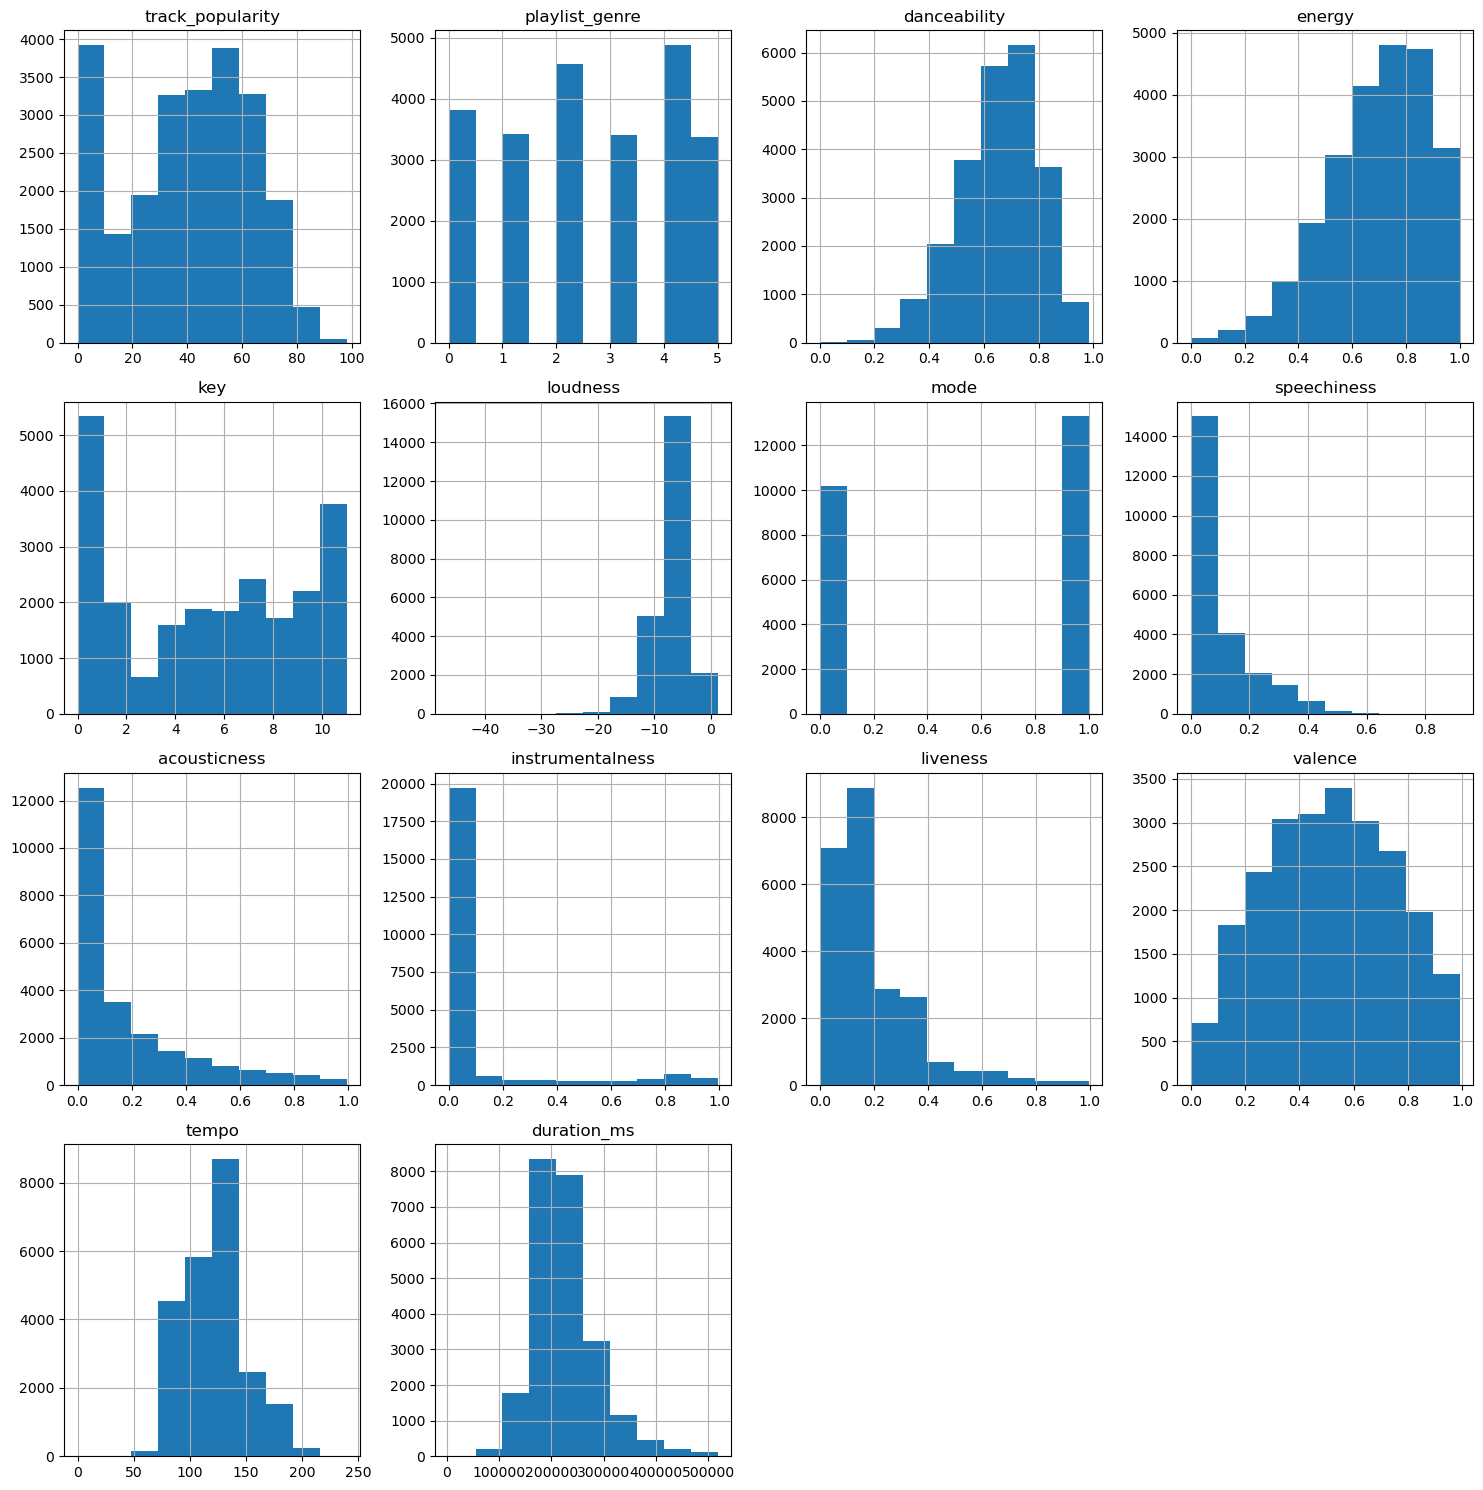

In [10]:
df.hist(figsize=(15, 15))
plt.tight_layout()
plt.show()

In [11]:
features = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

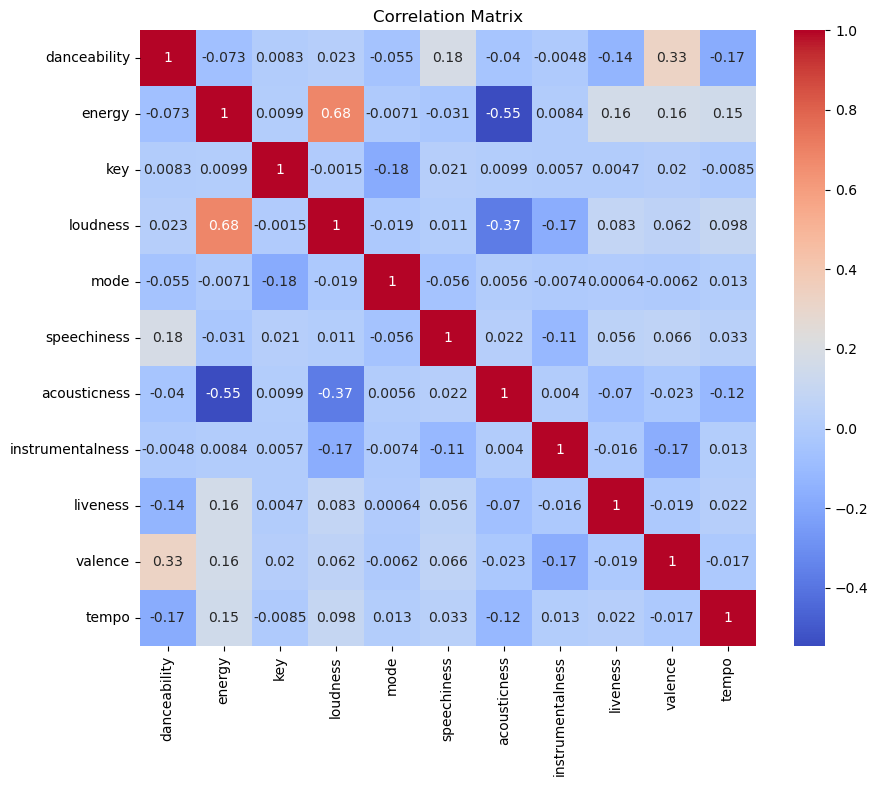

In [12]:

plt.figure(figsize=(10, 8))
sns.heatmap(df[features].corr(), annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

In [21]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import silhouette_score

In [27]:
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(df[features])

KMeans(n_clusters=5, random_state=42)

In [29]:
# Predict cluster labels
df['cluster'] = kmeans.predict(df[features])

In [31]:
# Silhouette score
silhouette = silhouette_score(df[features], df['cluster'])
print(f'Silhouette score: {silhouette:.3f}')

Silhouette score: 0.452


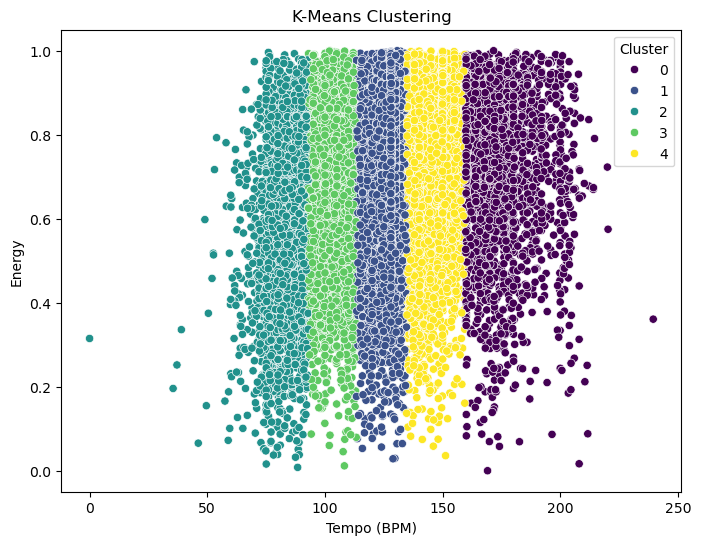

In [33]:
# Plot clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x='tempo', y='energy', data=df, hue='cluster', palette='viridis')
plt.title('K-Means Clustering')
plt.xlabel('Tempo (BPM)')
plt.ylabel('Energy')
plt.legend(title='Cluster')
plt.show()

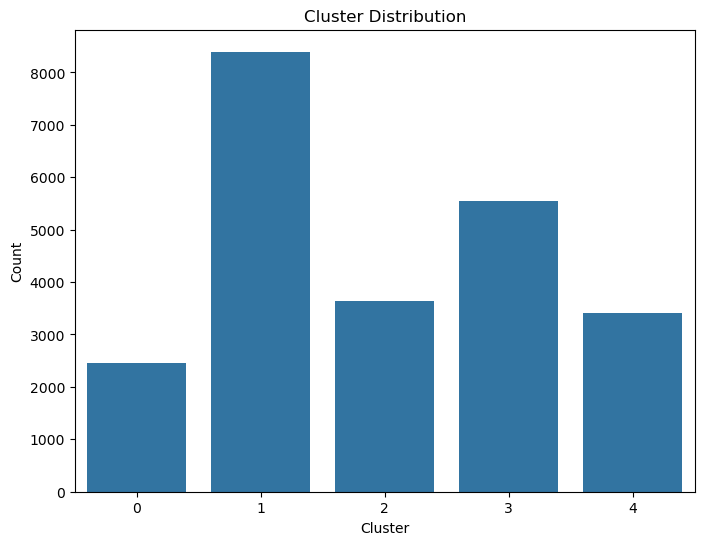

In [34]:

# Plot cluster distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='cluster', data=df)
plt.title('Cluster Distribution')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()


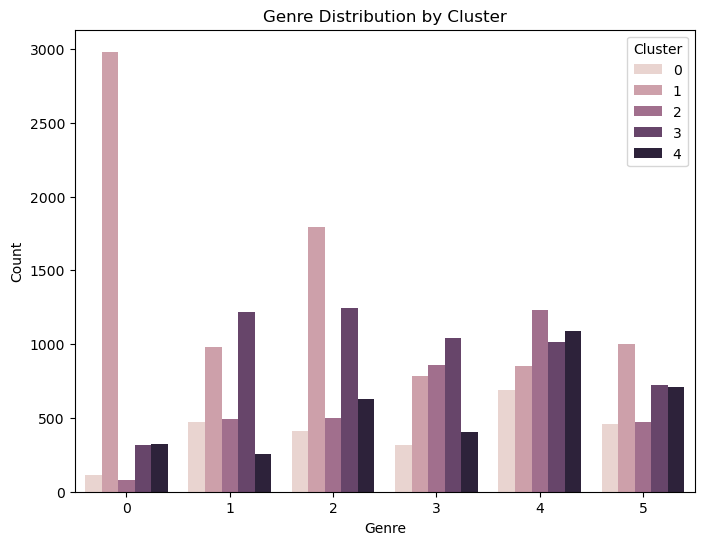

In [35]:
# Plot genre distribution by cluster
plt.figure(figsize=(8, 6))
sns.countplot(x='playlist_genre', data=df, hue='cluster')
plt.title('Genre Distribution by Cluster')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.legend(title='Cluster')
plt.show()

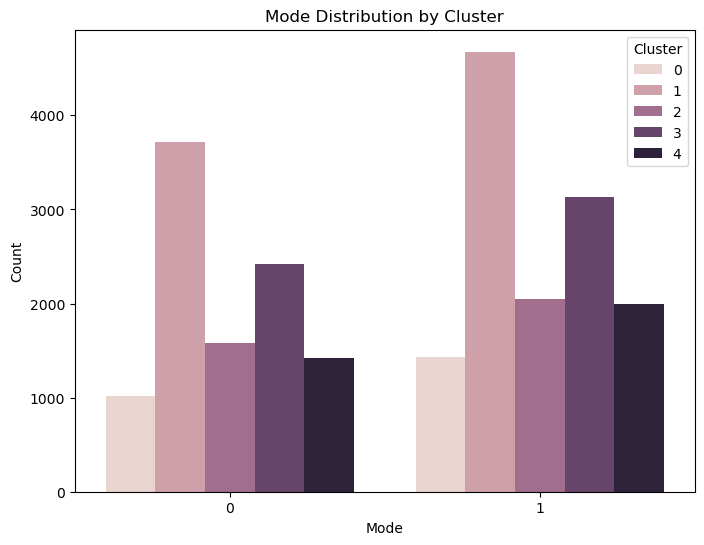

In [37]:
# Plot mood distribution by cluster
plt.figure(figsize=(8, 6))
sns.countplot(x='mode', data=df, hue='cluster')
plt.title('Mode Distribution by Cluster')
plt.xlabel('Mode')
plt.ylabel('Count')
plt.legend(title='Cluster')
plt.show()

In [41]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [43]:
# Scale features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[features])

In [45]:
# Determine optimal number of clusters
silhouette_scores = []
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(df_scaled)
    silhouette_scores.append(silhouette_score(df_scaled, kmeans.labels_))


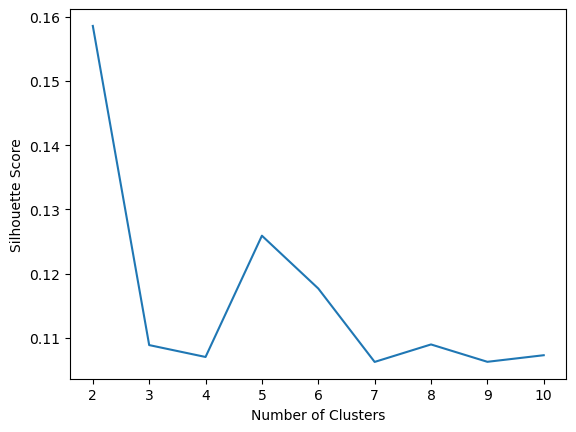

In [46]:
# Plot silhouette scores
plt.plot(range(2, 11), silhouette_scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [49]:
# Choose optimal number of clusters (e.g., 5)
n_clusters = 5


In [51]:
# Perform K-Means clustering
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(df_scaled)
df['cluster'] = kmeans.labels_

In [72]:
def recommend_songs(song_name, n_recs=10):
    # Convert song name to lower case
    song_name = song_name.lower()

    # Find song ID
    song_id = df.loc[df['track_name'].str.lower() == song_name, 'track_id'].values
    
    # Check if song exists
    if len(song_id) == 0:
        print(f"Song '{song_name}' not found in dataset.")
        return []
    
    # Use the first matching song ID
    song_id = song_id[0]
    
    # Get song's cluster
    song_cluster = df.loc[df['track_id'] == song_id, 'cluster'].values[0]

    # Get songs in the same cluster
    cluster_songs = df[(df['cluster'] == song_cluster) & (df['track_id'] != song_id)]

    # Check if cluster is empty
    if cluster_songs.empty:
        print(f"Cluster for song '{song_name}' is empty.")
        return []

    # Calculate distances between songs
    distances = []
    song_index = df[df['track_id'] == song_id].index[0]
    for _, row in cluster_songs.iterrows():
        row_index = row.name
        # Check if indices are within bounds
        if song_index < len(df_scaled) and row_index < len(df_scaled):
            distance = np.linalg.norm(df_scaled[song_index] - df_scaled[row_index])
            distances.append((row['track_id'], row['track_name'], row['track_artist'], distance))

    # Sort songs by distance
    distances.sort(key=lambda x: x[3])

    # Return top N recommendations
    return distances[:n_recs]

def main():
    # Convert DataFrame columns to lower case
    df['track_name'] = df['track_name'].str.lower()
    df['track_artist'] = df['track_artist'].str.lower()

    song_name = input("Enter a song name: ")
    n_recs = int(input("Enter the number of recommendations (default=10): ") or 10)
    
    recs = recommend_songs(song_name, n_recs)

    if recs:
        print(f"Recommendations based on '{song_name}':")
        for rec in recs:
            print(f"Track ID: {rec[0]}")
            print(f"Song Name: {rec[1].title()}")
            print(f"Artist Name: {rec[2].title()}")
            print(f"Distance: {rec[3]:.2f}")
            print("------------------------")

if __name__ == "__main__":
    main()

Enter a song name:  closer
Enter the number of recommendations (default=10):  8


Recommendations based on 'closer':
Track ID: 1sn5buxit6ioo37dajirqr
Song Name: Drowning Tonight
Artist Name: Jelly Roll
Distance: 1.17
------------------------
Track ID: 43mba6hqj2phjnmf1eyxrc
Song Name: It Will Feel
Artist Name: Saco
Distance: 1.70
------------------------
Track ID: 1xababhhvck94lgvc92yll
Song Name: Te Hace Falta
Artist Name: Baby Rasta & Gringo
Distance: 1.76
------------------------
Track ID: 0gch3k0s5optzyu1mpdssu
Song Name: I'Ll Whip Ya Head Boy
Artist Name: 50 Cent
Distance: 1.78
------------------------
Track ID: 0obwxflu6yj61s2oagybgy
Song Name: Gimme All Your Lovin'
Artist Name: Zz Top
Distance: 1.83
------------------------
Track ID: 1agza1lttcxeibhxriup4w
Song Name: From Me To You - Edit
Artist Name: Yolanda Be Cool
Distance: 1.93
------------------------
Track ID: 1cm25iyn6zkofnywtntvyb
Song Name: On A Sunday Afternoon
Artist Name: Lighter Shade Of Brown
Distance: 2.03
------------------------
Track ID: 7vvbhivpewg2rckismfquc
Song Name: Para Sacarmelo (Prod